### Hito2 para Determinantes del ingreso
*"Se generará un análisis descriptivo considerando el tipo de variables (desde el punto de vista estadístico así como computacional). Esta sección debe considerar medidas univariadas/ frecuencias, datos perdidos y gráficos distributivos sobre las variables a analizar. A partir de ésta se debe clarificar la estrategia de preprocesamiento (datos perdidos, recodificaciones)."*

### Etapa inicial

Carga de librerias, ambiente e importación de archivo <code>.csv</code> y revision inicial de calidad de datos.

In [195]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from calidad_datos2 import calidad_datos as cal
import funciones as fun
from graficos import *

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (8,6) # Tamaño gráficos (5, 3)
plt.rcParams["figure.dpi"] = 75 # resolución gráficos 100

In [196]:
df = pd.read_csv('income-db.csv')
print(df.shape)
df.head()

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [197]:
cal(df)

,tipo,nulos,porc_nulos,ceros,porc_ceros,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dist_IQR,limit_inf,limit_sup,outliers
age,int64,0,0.0,0,0.000000,48842.0,NaN,NaN,NaN,38.643585,13.71051,17.0,28.0,37.0,48.0,90.0,20.0,-2.0,78.0,216
fnlwgt,int64,0,0.0,0,0.000000,48842.0,NaN,NaN,NaN,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0,120091.5,-62586.75,417779.25,1453
educational-num,int64,0,0.0,0,0.000000,48842.0,NaN,NaN,NaN,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0,3.0,4.5,16.5,1794
capital-gain,int64,0,0.0,44807,0.917387,48842.0,NaN,NaN,NaN,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0,0.0,0.0,0.0,4035
capital-loss,int64,0,0.0,46560,0.953278,48842.0,NaN,NaN,NaN,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0,0.0,0.0,0.0,2282
hours-per-week,int64,0,0.0,0,0.000000,48842.0,NaN,NaN,NaN,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0,5.0,32.5,52.5,13496
workclass,object,0,0.0,0,0.000000,48842,9,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
education,object,0,0.0,0,0.000000,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
marital-status,object,0,0.0,0,0.000000,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
occupation,object,0,0.0,0,0.000000,48842,15,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### Proceso de preprocesamiento y recodificación de las variables


In [198]:
# Reemplazo caracteres anómalos a nan
df['occupation'] = df['occupation'].replace('?', np.nan)
df['workclass'] = df['workclass'].replace('?', np.nan)
df.occupation.value_counts()

#Reemplazo y agrupación por diccionario
df['occupation'] = df['occupation'].replace(fun.occupation)
df['workclass'] = df['workclass'].replace(fun.workclass)
df['education'] = df['education'].replace(fun.education)
df['marital-status'] = df['marital-status'].replace(fun.marital)
df['native-country'] = df['native-country'].replace(fun.native_country)

# Renombrar columnas
df.rename(columns=fun.rename, inplace=True)

#### Binarización de variable objetivo
Tal como se indico en el hito 1 la variable objetivo es <code>'income'</code>, se procede a recodificar la variable y guardar el dataframe procesado

In [199]:
# Recodificacion de variable objetivo
df['income'] = df['income'].replace(['<=50K', '>50K'], [0, 1]) # con 0 cuando es <=50K

#Generacion de .csv procesado
df.to_csv('income_ready.csv', index=False)

### Analisis Visual de variables
Calidad de datos:

In [200]:
cal(df)

,tipo,nulos,porc_nulos,ceros,porc_ceros,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dist_IQR,limit_inf,limit_sup,outliers
age,int64,0,0.000000,0,0.000000,48842.0,NaN,NaN,NaN,38.643585,13.71051,17.0,28.0,37.0,48.0,90.0,20.0,-2.0,78.0,216
fnlwgt,int64,0,0.000000,0,0.000000,48842.0,NaN,NaN,NaN,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0,120091.5,-62586.75,417779.25,1453
educational-num,int64,0,0.000000,0,0.000000,48842.0,NaN,NaN,NaN,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0,3.0,4.5,16.5,1794
capital-gain,int64,0,0.000000,44807,0.917387,48842.0,NaN,NaN,NaN,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0,0.0,0.0,0.0,4035
capital-loss,int64,0,0.000000,46560,0.953278,48842.0,NaN,NaN,NaN,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0,0.0,0.0,0.0,2282
hours-per-week,int64,0,0.000000,0,0.000000,48842.0,NaN,NaN,NaN,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0,5.0,32.5,52.5,13496
income,int64,0,0.000000,37155,0.760718,48842.0,NaN,NaN,NaN,0.239282,0.426649,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11687
workclass_recod,object,2799,0.057307,0,0.000000,46043,5,private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
educ_recod,object,0,0.000000,0,0.000000,48842,5,high-school,21353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
civstatus,object,0,0.000000,0,0.000000,48842,5,married,23044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


<AxesSubplot:>

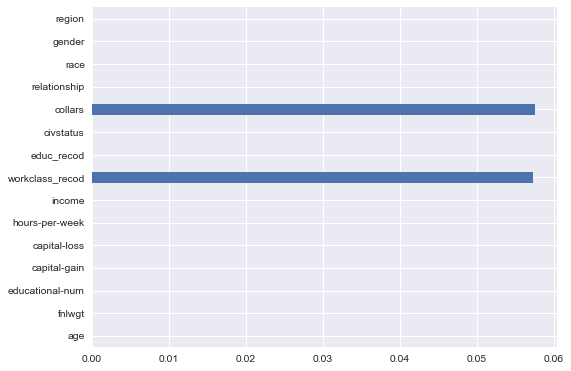

In [201]:
cal(df)['porc_nulos'].plot(kind='barh')

#### Vision general inicial:

- La variable objetivo esta desbalanceada, ya que tiene 76% de individuos con saldo menor a 50K.
- <code>capital-gain y capital-loss</code> tienen más de 90% de valores cero. Esto puede ser porque no han realizado inversiones.
- <code>workclass_recod y collars</code> son las unicas con valores nulos, pero en bajas trazas (menores al 6%).

### Revision variable objetivo income
Distribución :

- <code>income</code>, la VO (variable objetivo) se encuentra desbalanceada pero no implica un problema para realizar el analisis estadistico inicial. 

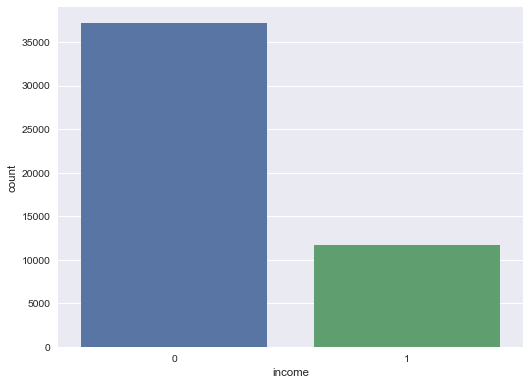

In [202]:
sns.countplot(x=df['income'])
plt.show()

Interacción de atributos categoricos con la variable objetivo:
- Se muestra la media en rojo
- Se indican las observaciones por atributos

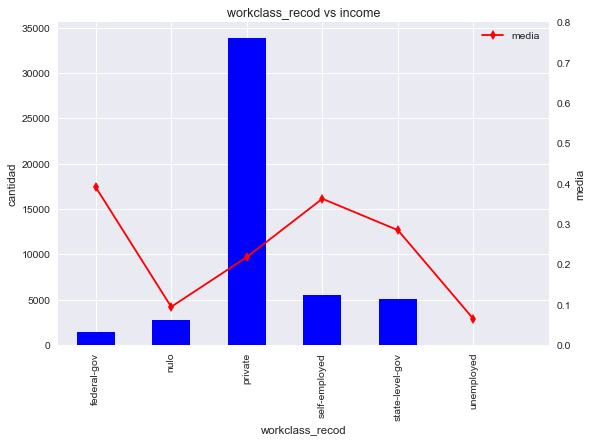

----------------------------------------------------------------------------------------------------


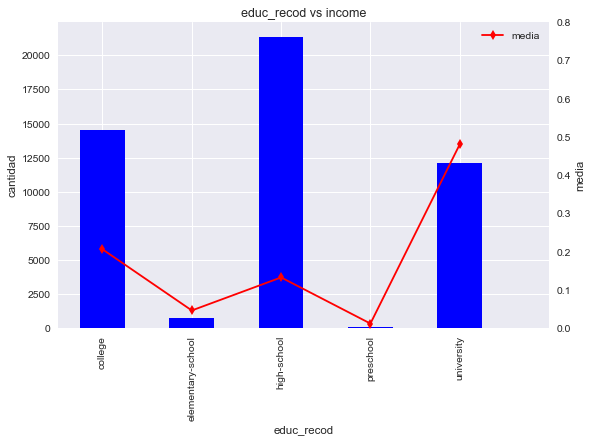

----------------------------------------------------------------------------------------------------


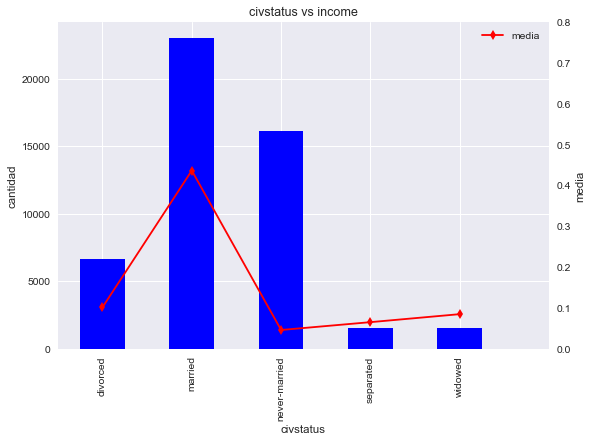

----------------------------------------------------------------------------------------------------


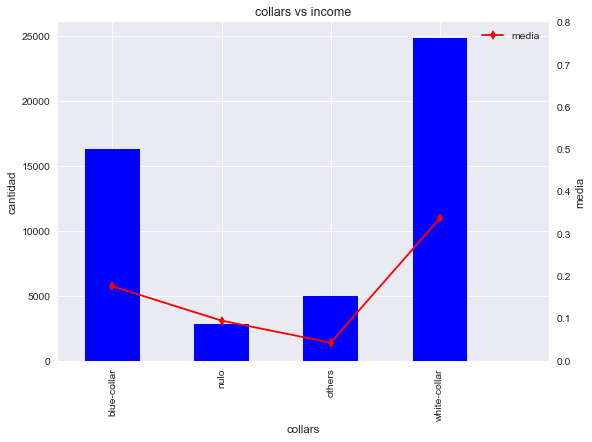

----------------------------------------------------------------------------------------------------


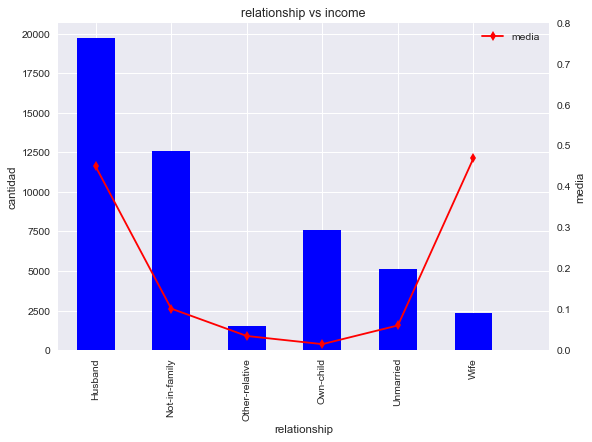

----------------------------------------------------------------------------------------------------


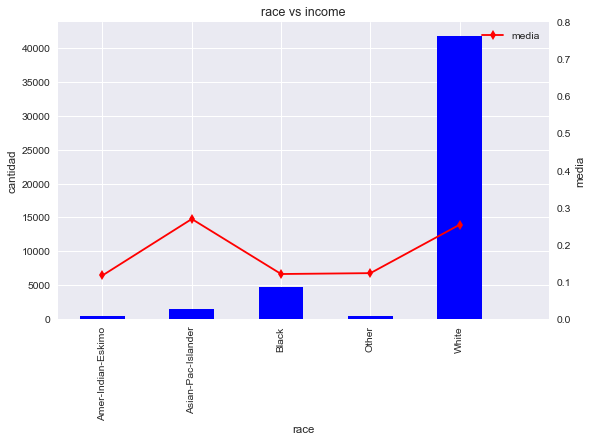

----------------------------------------------------------------------------------------------------


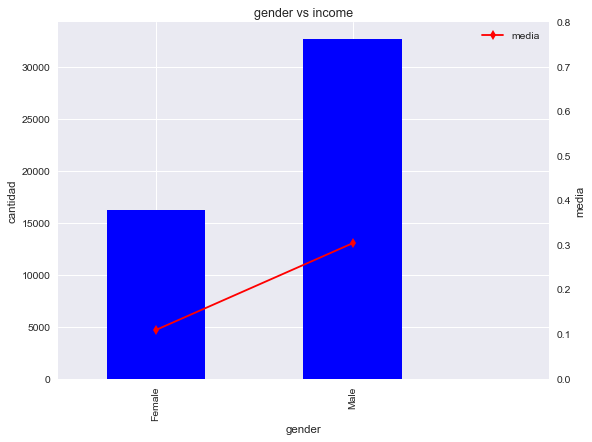

----------------------------------------------------------------------------------------------------


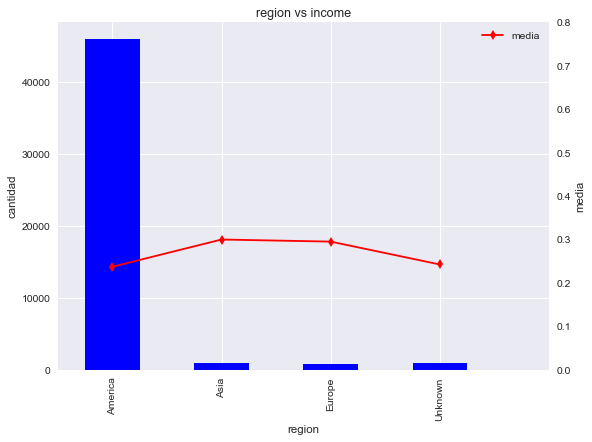

----------------------------------------------------------------------------------------------------


In [203]:
var_obj = 'income'
for col in cal(df).loc[cal(df).tipo == 'object'].index:
    df_group = df.fillna('nulo').groupby(col).agg({var_obj: ['count', 'mean']})
    df_group.columns = ['cantidad', 'media']
    df_group = df_group.reset_index()
    titulo = f'{col} vs {var_obj}'
    cross_plot(df_group, 'cantidad', 'media', col, size=(8, 6),
                    xlim =(-0.5, df_group.shape[0]),
                    ylim=(0, 0.8), titulo=titulo, order=0, medias=0)
    print('-'*100)
    

Resultados observados:

- Hay una acumulación de observaciones en ciertos atributos pero tienen una baja media en income (private, high-school, america, never-married)
- Hay una relacion directa entre el tipo de trabajo y la media de income. Donde los empleados del gobierno y los empleados por cuentra propia tienen mayores ingresos.
- educ_record, tambien puede ser un buen predictor, en niveles universitarios.
- Married en civstatus presenta altas observaciones y una media considerable.
- wife y Husband presentan mayores ingresos.
- Race esta balanceada, pero se debe analizar con mas detalle.
- Los hombres poseen mas observaciones y una media mayor.
- Apesar de que america tiene mas observaciones no afecta la media de las mismas.

#### Otras relaciones entre variables
- Relación del salario v/s edad (<code>income - age</code>):
    - Como se esperaba a mayor edad mayor ingresos.
- Relación de ingresos v/s horas trabajadas por genero(<code>income - hours-per-week - gender</code>):
    - Se aprecia que los hombres trabajan mas horas a la semana.
- Relación ingresos estado civil y edad (<code>income - age - civstatus</code> ):
    - Se aprecia que a mayor edad aumenta posibilidad de enviudar.
    - Solo se aprecia una diferencia de ingreseos significativa entre quienes nunca se han casado, el resto se comporta muy similar.

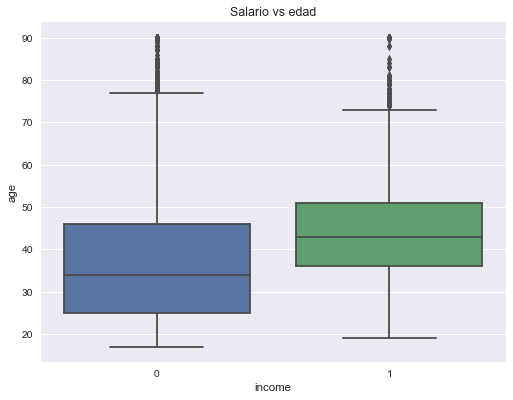

In [204]:
sns.boxplot(x='income', y='age', data=df)
plt.title('Salario vs edad')
plt.show()

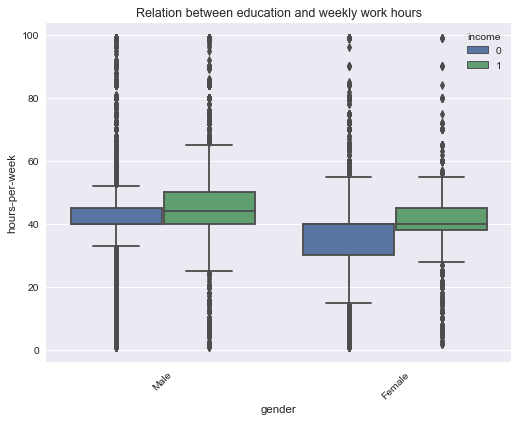

In [205]:
sns.boxplot(x='gender', y='hours-per-week', hue='income', data=df)
plt.title('Relation between education and weekly work hours')
plt.xticks(rotation=45)
plt.show()

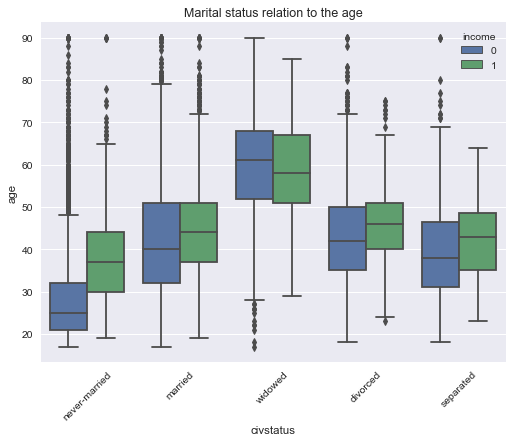

In [206]:
sns.boxplot(x='civstatus', y='age', hue='income', data=df)
plt.xticks(rotation=45)
plt.title('Marital status relation to the age')
plt.show()

#### Revision visual de correlaciones
- En general las correlaciones son bajas. Sin embargo, las relaciones más fuertes estan con las horas trabajadas a la semana, el nivel educacional, la edad, y la utilidad del capital invertido.

In [207]:
corre =abs(df.corr()['income']).sort_values(ascending=False)
print(corre)

income             1.000000
educational-num    0.332613
age                0.230369
hours-per-week     0.227687
capital-gain       0.223013
capital-loss       0.147554
fnlwgt             0.006339
Name: income, dtype: float64


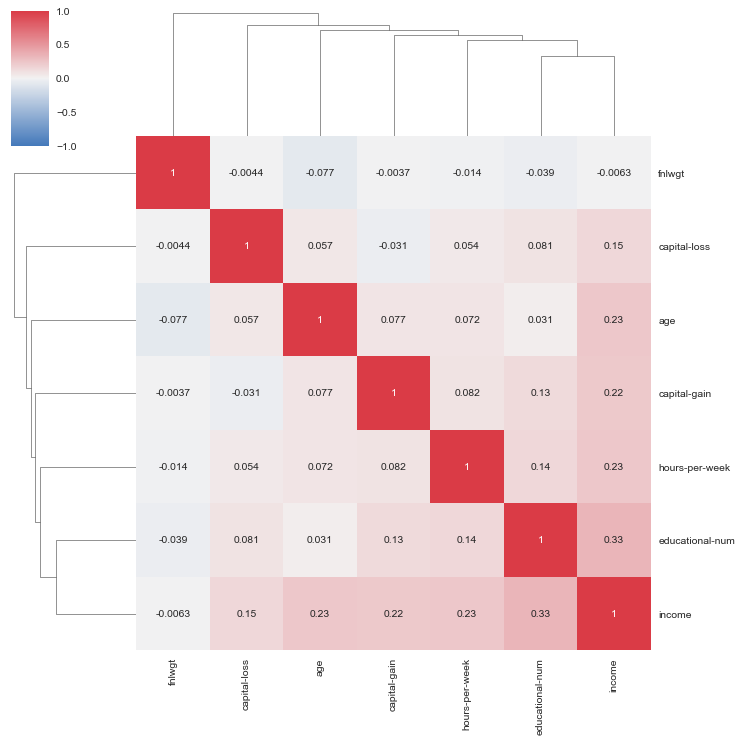

In [208]:
sns.clustermap(df.corr(), annot=True, cmap=cmap, vmin=-1, vmax=1)